In [49]:
import sys
import os
%matplotlib inline
sys.path.append(os.path.abspath('../src'))
from model_training import train_model, get_untrained_custom_model, plot_training_history
from utils import save_model, load_data, test_gpu

In [50]:
#making sure the gpu is available
test_gpu()

Num GPUs Available:  1


In [51]:
train_data_path = '../datasets/ready/train/'
val_data_path = '../datasets/ready/val/'

#loading the datasets
x_train = load_data(train_data_path+"x_train.csv")
y_train = load_data(train_data_path+"y_train.csv")
x_val = load_data(val_data_path+"/x_val.csv")
y_val = load_data(val_data_path+"/y_val.csv")

In [52]:
save_path = '../models'
# Setting up hyperparameters
batch_size = 64
epochs = 256

optimizer='adam'
loss='binary_crossentropy' 
metrics=['accuracy']

In [53]:
# Getting the model
model = get_untrained_custom_model(optimizer=optimizer, loss=loss, metrics=metrics, x_train=x_train)

In [54]:
#traingin the random forest model 
history = train_model(model, x_train, y_train, epochs, x_val, y_val, batch_size)

Epoch 1/256
9/9 [==============================] - 1s 22ms/step - loss: 0.6852 - accuracy: 0.6199 - val_loss: 0.6691 - val_accuracy: 0.6629
Epoch 2/256
9/9 [==============================] - 0s 12ms/step - loss: 0.6511 - accuracy: 0.6442 - val_loss: 0.6343 - val_accuracy: 0.6517
Epoch 3/256
9/9 [==============================] - 0s 11ms/step - loss: 0.6352 - accuracy: 0.6629 - val_loss: 0.6365 - val_accuracy: 0.6067
Epoch 4/256
9/9 [==============================] - 0s 11ms/step - loss: 0.6286 - accuracy: 0.6592 - val_loss: 0.6352 - val_accuracy: 0.6798
Epoch 5/256
9/9 [==============================] - 0s 17ms/step - loss: 0.6181 - accuracy: 0.6610 - val_loss: 0.6443 - val_accuracy: 0.6685
Epoch 6/256
9/9 [==============================] - 0s 12ms/step - loss: 0.6139 - accuracy: 0.6536 - val_loss: 0.6389 - val_accuracy: 0.6854
Epoch 7/256
9/9 [==============================] - 0s 14ms/step - loss: 0.6141 - accuracy: 0.6685 - val_loss: 0.6453 - val_accuracy: 0.6798
Epoch 8/256
9/9 [===

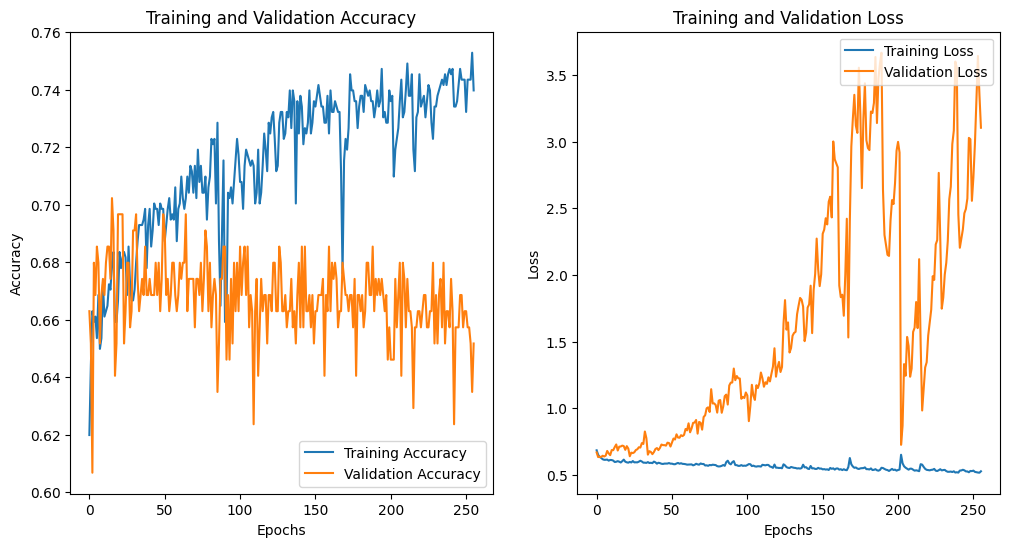

In [55]:
# Get predictions on the training data
plot_training_history(history)

In [56]:
# Saving the model
save_model(model, save_path)

INFO:tensorflow:Assets written to: ../models/assets
